# COVID-19 Cases Dataset

Data is taken from https://ourworldindata.org/covid-cases and describes daily new confirmed COVID-19 cases per million people for each country. To download, visit the site and in the bottom right of the first graph, there is a button that says download. Click, and select full data set (csv).

There are a couple interesting questions for this dataset:
1. How does the United States compare against the world average, as well as a select few countries? Comparing all countries may be too much
2. Is there a relationship between new cases and life expetancy, hand-washing facilities, life expectancy, or hospital beds?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Overview

Read in the data and print summaries (pd.describe()) and column indicies (df.columns)

In [2]:
df = pd.read_csv ('owid-coid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166784,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166785,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166786,ZWE,Africa,Zimbabwe,2022-03-05,239019.0,280.0,459.429,5397.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166787,ZWE,Africa,Zimbabwe,2022-03-06,239209.0,190.0,486.571,5399.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.637490e+05,1.636090e+05,1.616250e+05,1.458890e+05,145936.000000,143838.000000,162989.000000,162849.000000,160871.000000,145142.000000,...,106342.000000,104883.000000,68759.000000,124004.000000,155698.000000,136631.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.552188e+06,1.160895e+04,1.161472e+04,5.783416e+04,170.978751,172.593306,29699.304718,167.661325,166.616877,511.231201,...,10.627070,32.778506,50.787279,3.027742,73.576066,0.725578,3.761302e+04,9.404336,15.967077,972.197816
std,1.555033e+07,8.457752e+04,8.281271e+04,3.029782e+05,831.636513,816.612569,52449.395497,712.136441,536.112898,786.770125,...,10.558093,13.523948,31.811550,2.450035,7.491502,0.149963,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.017000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,626.131000,0.041000,1.630000,18.625750,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.626000e+04,7.900000e+01,1.072860e+02,7.850000e+02,2.000000,2.429000,4769.698000,11.432000,18.890000,128.689000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,3.006610e+05,1.065000e+03,1.150571e+03,7.324000e+03,20.000000,21.286000,38057.766000,101.386000,121.408000,715.999750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.478822e+08,4.206334e+06,3.444237e+06,6.007317e+06,18020.000000,14689.143000,706541.904000,77691.083000,16052.608000,6329.697000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Plots Using Pivot Table

In [5]:
# Pivot table of new cases smoothed per million by date and location
column = 'new_cases_smoothed_per_million'
df2 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df2

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.091,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.003,NaN,0.102,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.138,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.163,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.006,NaN,0.192,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-03,4.185,4.871,43.659,1.687,709.170,0.189,255.018,20.258,134.851,122.107,...,3.397,0.000,0.0,14.910,1228.387,0.0,189.840,0.098,9.634,24.005
2022-03-04,4.052,4.578,44.206,1.537,803.357,0.400,255.018,17.364,131.327,106.657,...,3.094,0.000,0.0,13.980,1366.394,0.0,191.850,0.070,9.355,30.972
2022-03-05,4.250,4.628,44.206,1.438,803.357,0.400,255.018,26.046,127.678,86.779,...,2.804,0.000,0.0,11.262,1474.636,0.0,192.477,0.070,8.555,30.442


Text(0.5, 1.0, 'New Cases Per Million Per Country')

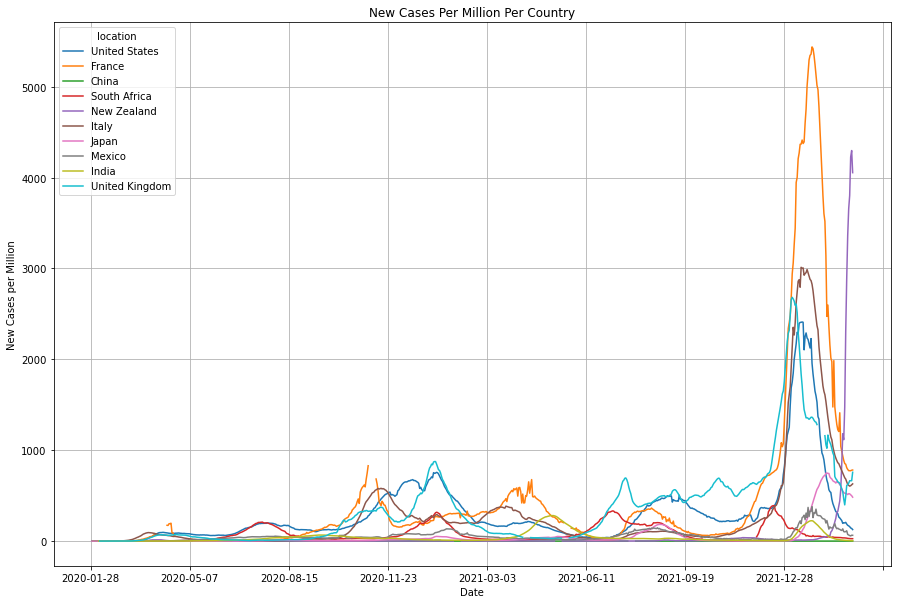

In [6]:
# Plot new cases per million for selected various countries using above pivot table
df2[['United States','France','China','South Africa','New Zealand','Italy','Japan','Mexico','India','United Kingdom']].plot(figsize=(15,10))

# Add grid, labels, title, format
plt.grid()
plt.ylabel('New Cases per Million')
plt.xlabel('Date')
plt.title('New Cases Per Million Per Country')

The above plot shows new case per million over time of a select few countries. Some countries, such as Japan, China, an New Zealand (up until recently) did very well and have had very few cases. The United Kingdom, France, the United States, Italy, and other countries have a large number of cases. 

Up until December of 2021, peaks are a result of waves from the Alpha, Beta, and Delta variants. They are staggered, based on when those variants arrive in that country. The United States cases usually peak slightly after others, as variants are often first found on the other side of the Atlantic and take some time to arrive to the States.

The peaks on and after December of 2021 are attributed to the Omicron variant, resulting in record numbers of new cases. France appears to have the most new cases per million, but is now coming back down. Italy, the United States, and the United Kingsom have high peaks but are also returning to their previous numbers. New Zealand, previous with very low numbers, is currently spiking dramatically.

In [7]:
# Pivot table of new deaths smoothed per million by date and location
column = 'new_deaths_smoothed_per_million'
df3 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df3

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-03,0.147,0.121,0.845,0.090,0.0,0.004,0.0,0.0,2.064,5.439,...,3.361,0.046,0.0,0.090,NaN,0.0,0.947,0.023,0.076,0.057
2022-03-04,0.143,0.106,0.995,0.093,0.0,0.004,0.0,0.0,2.086,4.957,...,3.361,0.038,0.0,0.085,NaN,0.0,0.940,0.019,0.083,0.047
2022-03-05,0.133,0.100,0.995,0.080,0.0,0.004,0.0,0.0,2.067,4.572,...,3.238,0.029,0.0,0.080,NaN,0.0,0.924,0.009,0.053,0.038


Text(0.5, 1.0, 'New Deaths Per Million Per Country')

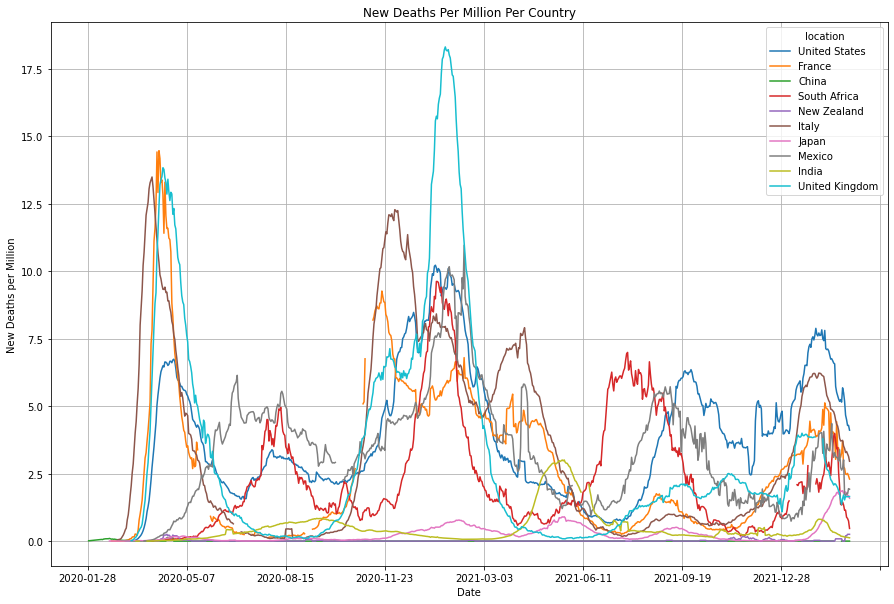

In [8]:
# Plot new deaths per million for various selected countries using above pivot table
df3[['United States','France','China','South Africa','New Zealand','Italy','Japan','Mexico','India','United Kingdom']].plot(figsize=(15,10))

# Add grid, labels, title, format
plt.grid()
plt.ylabel('New Deaths per Million')
plt.xlabel('Date')
plt.title('New Deaths Per Million Per Country')

The above plot shows the number of new deaths per million in a select number of countries. China, Japan, and New Zealand have has very few deaths, just as with new cases. The United Kingdom, France, the United States, Italy, and other countries have more deathes per million.

Again, the peaks coincide with the variants, where some countries are shifted depending on when the waves arrived. Most deaths appear to be due to Alpha and Delta variants, judging by the dates for the peaks around April 2020 and January 2021. The Omicron variant resulting in fewer deaths than the previous variants, especially considering the number of new cases is several times higher than previous peaks. This indicates that the Omicron variant, while contagious and not necessarily well-handled, has very low fatality rates and is in that sense much weaker than previous variants.

## Plots with df and groupby

Text(0.5, 1.0, 'New Cases Per Million in the World')

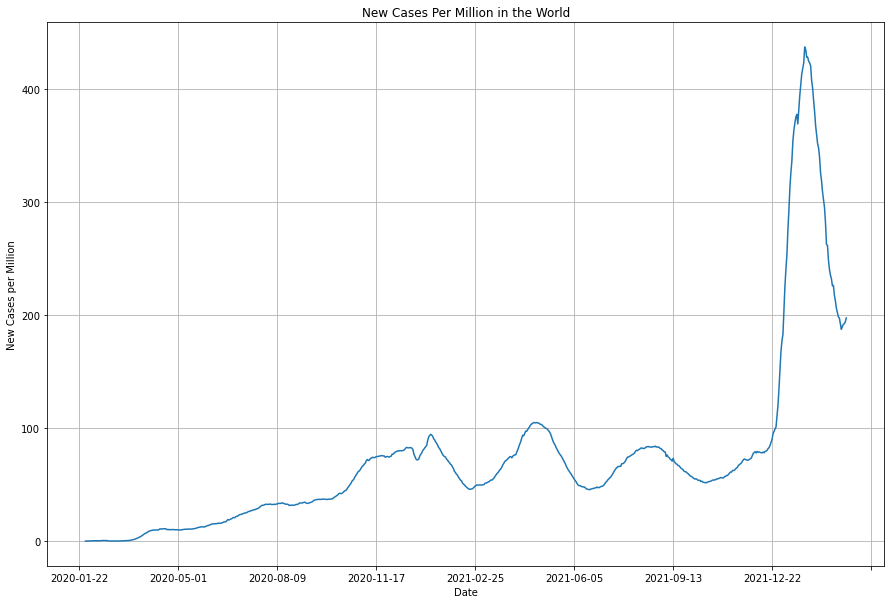

In [9]:
# Use groupby and get_group to plot new cases per million in the entire world
# groupby location and get world group to select desired rows
df.groupby('location').get_group('World').plot(x='date',y='new_cases_smoothed_per_million',figsize=(15,10),legend=False)

# Add grid, labels, title, format
plt.grid()
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.ylabel('New Cases per Million')
plt.xlabel('Date')
plt.title('New Cases Per Million in the World')

Directly using the data frame and the groupby feature, plotted above are new cases smoothed per million in the entire world over time. Notice the peaks around late 2020, April 2021, August 2021, and early this year. These coincide with the emergence of Alpha, Beta, and then Delta variants as the cases came in waves, with the most recent and largest spike likely being attributed to Omicron.

Text(0.5, 1.0, 'Relationship between Total Cases per Million and Human Development Index')

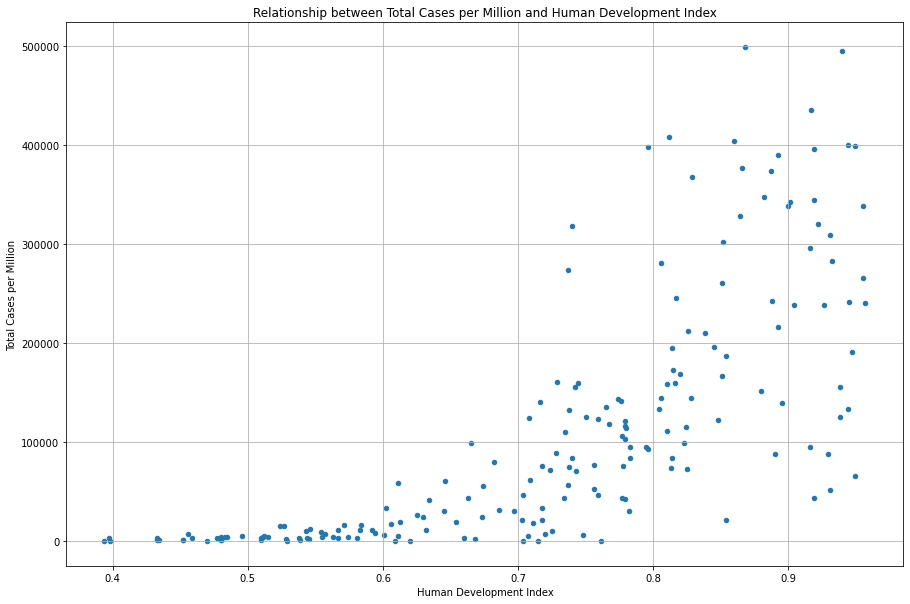

In [10]:
# Use scatter to plot relationship between total cases per million and human development index
# Select rows for the most recent date, plot relevant columns
df[df['date']=='2022-03-07'].plot.scatter(x='human_development_index',y='total_cases_per_million',figsize=(15,10))

# Add grid, labels, title, format
plt.grid()
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.ylabel('Total Cases per Million')
plt.xlabel('Human Development Index')
plt.title('Relationship between Total Cases per Million and Human Development Index')

Above is plotted most recent total cases per million with respect to the human development index. For low indices, there are extremely few cases, but for more developed countries, there is an increasingly wide range of case numbers. It appears there is a positive correlation between how developed a country is and the number of covid cases. This suggests that covid is primarily a problem in the developed world.

One possible explanation is that there is more travel between developed countries, so the virus spreads more easily there. Another possibiliy is that in more developed, democratic countries, citizens have greater freedom to travel outside of their homes, whereas a more authoritarian government may more effectively restrict human-to-human contact.

Text(0.5, 1.0, 'New Cases per Million in the Developed World')

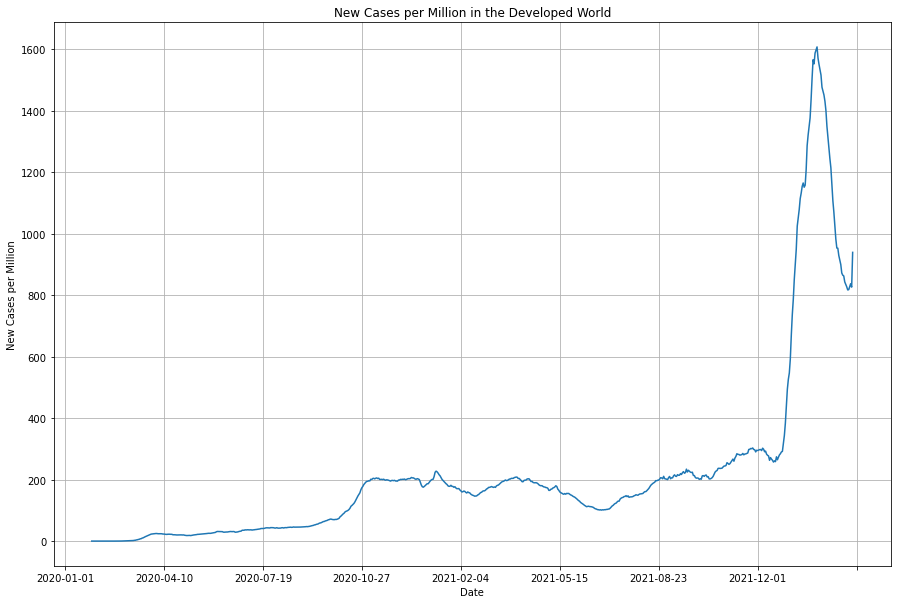

In [11]:
# Use groupby and agg to repeat to plot of cases per million in the world, but restrict to the developed world
# select only rows were are interested in (development > .7), then group by date to get mean
df[df['human_development_index'] > .7].groupby('date').new_cases_smoothed_per_million.agg('mean').plot(x='date',y='new_cases_smoothed',figsize=(15,10),legend=False)

# Add grid, labels, title, format
plt.grid()
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.ylabel('New Cases per Million')
plt.xlabel('Date')
plt.title('New Cases per Million in the Developed World')

To re-affirm the conclusion reached in the previous plot, this one evaluates cases per million in the developed world (defined by human_development_index > 0.7). The cases are double to quadruple that of the world average.